# Autour du Paradoxe de Simpson

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

En 1972-1974, à Whickham, une ville du nord-est de l'Angleterre, située à environ 6,5 kilomètres au sud-ouest de Newcastle upon Tyne, un sondage d'un sixième des électeurs a été effectué afin d'éclairer des travaux sur les maladies thyroïdiennes et cardiaques (Tunbridge et al. 1977). Une suite de cette étude a été menée vingt ans plus tard (Vanderpump et al. 1995). Certains des résultats avaient trait au tabagisme et cherchaient à savoir si les individus étaient toujours en vie lors de la seconde étude. Par simplicité, nous nous restreindrons aux femmes et parmi celles-ci aux 1314 qui ont été catégorisées comme "fumant actuellement" ou "n'ayant jamais fumé". Il y avait relativement peu de femmes dans le sondage initial ayant fumé et ayant arrêté depuis (162) et très peu pour lesquelles l'information n'était pas disponible (18). La survie à 20 ans a été déterminée pour l'ensemble des femmes du premier sondage.

Les données de ces études sont disponibles  sur le gitlab de l'inria dans un [document csv](https://gitlab.inria.fr/learninglab/mooc-rr/mooc-rr-ressources/-/blob/master/module3/Practical_session/Subject6_smoking.csv). Dans ce document, chaque ligne indique si la personne fume ou non, si elle est vivante ou décédée au moment de la seconde étude, et son âge lors du premier sondage. Nous téléchargeons toujours l'ensemble complet des données du document.


In [2]:
data_url = "https://gitlab.inria.fr/learninglab/mooc-rr/mooc-rr-ressources/-/raw/master/module3/Practical_session/Subject6_smoking.csv" 

Pour nous protéger contre une éventuelle disparition ou modification du serveur du gitlab, nous faisons une copie locale de ce jeux de données que nous préservons avec notre analyse. Il est inutile et même risquée de télécharger les données à chaque exécution, car dans le cas d'une panne nous pourrions remplacer nos données par un fichier défectueux. Pour cette raison, nous téléchargeons les données seulement si la copie locale n'existe pas.

In [3]:
data_file = "survey-data-subject6.csv"

import os
import urllib.request
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

Le document comporte trois colonnes : la première colonne indique leur habitude de tabagisme, la deuxième renseigne si la personne est vivante ou décédée au moment de la seconde étude et enfin, la troisième colonne indique leur âge lors de la première étude

In [4]:
raw_data = pd.read_csv(data_file)
raw_data

Smoker Status   Age
0       Yes  Alive  21.0
1       Yes  Alive  19.3
2        No   Dead  57.5
3        No  Alive  47.1
4       Yes  Alive  81.4
5        No  Alive  36.8
6        No  Alive  23.8
7       Yes   Dead  57.5
8       Yes  Alive  24.8
9       Yes  Alive  49.5
10      Yes  Alive  30.0
11       No   Dead  66.0
12      Yes  Alive  49.2
13       No  Alive  58.4
14       No   Dead  60.6
15       No  Alive  25.1
16       No  Alive  43.5
17       No  Alive  27.1
18       No  Alive  58.3
19      Yes  Alive  65.7
20       No   Dead  73.2
21      Yes  Alive  38.3
22       No  Alive  33.4
23      Yes   Dead  62.3
24       No  Alive  18.0
25       No  Alive  56.2
26      Yes  Alive  59.2
27       No  Alive  25.8
28       No   Dead  36.9
29       No  Alive  20.2
...     ...    ...   ...
1284    Yes   Dead  36.0
1285    Yes  Alive  48.3
1286     No  Alive  63.1
1287     No  Alive  60.8
1288    Yes   Dead  39.3
1289     No  Alive  36.7
1290     No  Alive  63.8
1291     No   Dead  71.3
1292     No  Alive  57.7
1293     No  Alive  63.2
1294     No  Alive  46.6
1295    Yes   Dead  82.4
1296    Yes  Alive  38.3
1297    Yes  Alive  32.7
1298     No  Alive  39.7
1299    Yes   Dead  60.0
1300     No   Dead  71.0
1301     No  Alive  20.5
1302     No  Alive  44.4
1303    Yes  Alive  31.2
1304    Yes  Alive  47.8
1305    Yes  Alive  60.9
1306     No   Dead  61.4
1307    Yes  Alive  43.0
1308     No  Alive  42.1
1309    Yes  Alive  35.9
1310     No  Alive  22.3
1311    Yes   Dead  62.1
1312     No   Dead  88.6
1313     No  Alive  39.1

[1314 rows x 3 columns]

Pour nous assurer que le jeu de données est complet, nous vérifions qu'il n'y a pas d'informations manquantes conernant l'une des personnes du sondage. Après vérification, il n'y a pas de données manquantes.

In [5]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [Smoker, Status, Age]
Index: []

Nous calculons le nombre total de femmes vivantes et décédées sur la période en fonction de leur habitude de tabagisme

In [6]:
alive_and_smoker = 0
alive_and_non_smoker = 0
dead_and_smoker = 0
dead_and_non_smoker = 0
for i in range(len(raw_data)):
    if raw_data.iloc[i][0] == "Yes":
        if raw_data.iloc[i][1] == "Alive":
            alive_and_smoker += 1
        else :
            dead_and_smoker += 1
    else :
        if raw_data.iloc[i][1] == "Alive":
            alive_and_non_smoker += 1
        else :
            dead_and_non_smoker += 1

Nous représentons ensuite ces données sous la forme d'un tableau. 

In [7]:
data = [[alive_and_smoker,alive_and_non_smoker],[dead_and_smoker, dead_and_non_smoker]]

pd.DataFrame(data, columns=["Smoker", "Non-Smoker"], index = ["Alive", "Dead"])

Smoker  Non-Smoker
Alive     443         502
Dead      139         230

A present, nous allons calculer le taux de mortalite dans chacun de ces deux groupes. Pour cela, nous allons determiner le rapport entre le nombre de femmes décédées dans un groupe et le nombre total de femmes dans ce groupe. Dans le groupe des femmes fumeuses, le taux de mortalite est 0,24 tandis que dans le groupe des femmes non fumeuses, le taux de mortalite est 0,31.

In [11]:
mortality_rate_smoker = dead_and_smoker/(alive_and_smoker+dead_and_smoker)
mortality_rate_non_smoker = dead_and_non_smoker /(alive_and_non_smoker + dead_and_non_smoker)
print("Taux de mortalite fumeuses :", mortality_rate_smoker)
print("Taux de mortalite non-fumeuses :", mortality_rate_non_smoker)

Taux de mortalite fumeuses : 0.23883161512027493
Taux de mortalite non-fumeuses : 0.31420765027322406


Nous representons les taux de mortalite calcules precedemment dans un diagramme de barres afin d'illustrer visuellement nos resultats.

Text(0,0.5,'Mortality Rate')

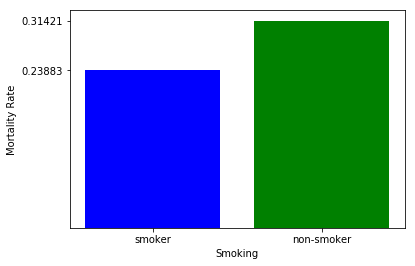

In [15]:
mortality_rate = [mortality_rate_smoker,mortality_rate_non_smoker]
smoking = ['smoker', 'non-smoker']
plt.bar(smoking, mortality_rate,color=['blue', 'green'])
plt.xticks(smoking)
plt.yticks(mortality_rate)
plt.xlabel('Smoking')
plt.ylabel('Mortality Rate')